In [1]:
# import libraries
import time
import random as r
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
# settings
sns.reset_orig
sns.set_style('darkgrid')
sns.set_palette('Set1')

np.set_printoptions(linewidth=200)

In [3]:
# initialize the random state using a seed
epoch = int(time.time())
r.seed(epoch)

print(f'Seeded at {epoch}.')

Seeded at 1653244571.


In [4]:
# create random coordinate function (-100 < X < 100)
rcoord = lambda: r.random() * 100 * (-1 if r.randrange(2) else 1)

In [5]:
# create set of customers
i_data = pd.DataFrame()
len_ = 100

i_data['X'] = [rcoord() for _ in range(len_)]
i_data['Y'] = [rcoord() for _ in range(len_)]
i_data['Demand'] = [r.random() + r.randrange(50, 100) for _ in range(len_)]

i_data.head(10)

,X,Y,Demand
0,61.947763,14.853396,63.864683
1,-69.622825,-41.764299,94.238807
2,73.587398,87.929919,54.382429
3,5.436791,84.878267,64.801984
4,-75.590290,-55.263838,52.018050
5,-81.437459,94.469295,63.194892
6,67.355063,-98.879208,76.034482
7,-58.514338,-61.891328,66.554048
8,-58.267055,-36.977391,58.451507
9,43.256694,69.497937,87.470706


In [6]:
# create set of candidate locations
j_data = pd.DataFrame()
len_ = 20

j_data['X'] = [rcoord() for _ in range(len_)]
j_data['Y'] = [rcoord() for _ in range(len_)]

j_data.head(10)

,X,Y
0,75.108569,-67.227404
1,-2.204440,-46.059871
2,6.913147,21.840478
3,11.835899,-15.468574
4,88.173068,73.143358
5,-86.053608,-19.222496
6,54.956840,-99.990075
7,56.544489,15.120323
8,-92.547142,-33.748769
9,8.367059,-39.301440


Text(0.5, 1.0, 'Customer and Facility Locations')

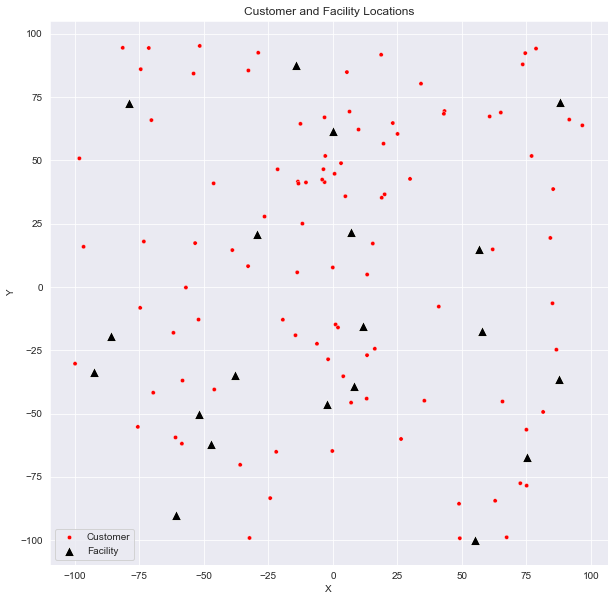

In [7]:
# plot the customers and facilities
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='X', y='Y', data=i_data, size=1, color='red', legend=False, label="Customer")
sns.scatterplot(x='X', y='Y', data=j_data, s=100, color='black', marker='^', label="Facility")
plt.legend()
plt.title('Customer and Facility Locations')

In [13]:
# create distance matrix
eucl = lambda x1, x2, y1, y2: ((x1 - x2)**2 + (y1 - y2)**2)**0.5

i_loc = i_data[['X', 'Y']].values
j_loc = j_data[['X', 'Y']].values

dist_ij = np.array([[eucl(i[0],i[1],j[0],j[1]) for j in j_loc] for i in i_loc])
dist_ij

array([[149.92467649,  64.35198745,  49.4034882 , ..., 132.79378489,  55.27200622,  47.22128642],
       [145.0366391 ,  51.95571528,  31.60573851, ..., 127.24939043,  40.16481959,  28.07254801],
       [143.05676182,  46.14116136,  20.70104171, ..., 124.98807058,  32.29277246,  14.75392738],
       ...,
       [158.72397559,  82.80742778,  71.80944543, ..., 142.65371047,  75.96635096,  70.32596745],
       [157.25355422,  79.95279846,  68.49800244, ..., 141.01581825,  72.84412374,  66.94118003],
       [218.46713522, 171.43995694, 166.40668614, ..., 207.08614114, 168.24231102, 165.77192295]])

In [9]:
# save new data to files
with pd.ExcelWriter('data.xlsx', mode='w') as writer:
    i_data.to_excel(writer, sheet_name='i_data', index=False)
    j_data.to_excel(writer, sheet_name='j_data', index=False)
    pd.DataFrame(dist_ij).to_excel(writer, sheet_name='dist_ij', index=False)
    
print('Done')

Done
